# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

(846, 19) (846,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [17]:
data_pd = pd.DataFrame(data)

# First 15 rows of our dataset.
data_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
5,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183
6,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202
8,8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208
9,9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [18]:
data_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,422.500000,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,244.363459,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,211.250000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,422.500000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,633.750000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [20]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
0     846 non-null int64
1     846 non-null int64
2     846 non-null int64
3     846 non-null int64
4     846 non-null int64
5     846 non-null int64
6     846 non-null int64
7     846 non-null int64
8     846 non-null int64
9     846 non-null int64
10    846 non-null int64
11    846 non-null int64
12    846 non-null int64
13    846 non-null int64
14    846 non-null int64
15    846 non-null int64
16    846 non-null int64
17    846 non-null int64
18    846 non-null int64
dtypes: int64(19)
memory usage: 125.7 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [24]:
from sklearn import preprocessing

# В данных нет пропусков, все признаки числовые, поэтому ограничимся только масштабирование признаков. 

normalizer = preprocessing.MinMaxScaler()
data = normalizer.fit_transform(data)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 19) (549,) (297, 19) (297,)


#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve

In [39]:
# Подбираем оптимальные параметры
lr = LogisticRegression(solver='saga', max_iter=10000, multi_class='multinomial', n_jobs=-1)
params = {'penalty': ['l1', 'l2'], 'C': np.linspace(0.1, 3, 30)}
gc = GridSearchCV(estimator=lr, param_grid=params, scoring='accuracy', cv=5)

gc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
print('Best score: {:.3f}'.format(gc.best_score_))
print('Best params: penalty = {:}, C = {:.1f}'.format(gc.best_params_['penalty'], gc.best_params_['C']))

Best score: 0.781
Best params: penalty = l1, C = 2.9


In [109]:
# Обучим LR с помощью найденных оптимальных параметров 
lr = LogisticRegression(solver='saga', max_iter=10000, multi_class='multinomial', n_jobs=-1, penalty='l1', C=2.9)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression classifier on test set: {:.3f}'.format(
    accuracy_score(y_true=y_test, y_pred=predictions)))
print('F1-score of Logistic Regression classifier on test set: {:.3f}'.format(
    f1_score(y_true=y_test, y_pred=predictions, average='macro')))

Accuracy of Logistic Regression classifier on test set: 0.747
F1-score of Logistic Regression classifier on test set: 0.753


In [110]:
def binarize(X_test, y_test, estimator):
    bus_true = np.where(y_test == 'bus', 1, 0)
    opel_true = np.where(y_test == 'opel', 1, 0)
    saab_true = np.where(y_test == 'saab', 1, 0)
    van_true = np.where(y_test == 'van', 1, 0)
    
    proba = estimator.predict_proba(X_test)
    
    bus_proba = proba[:, 0]
    opel_proba = proba[:, 1]
    saab_proba = proba[:, 2]
    van_proba = proba[:, 3]
    return [bus_true, opel_true, saab_true, van_true], [bus_proba, opel_proba, saab_proba, van_proba]

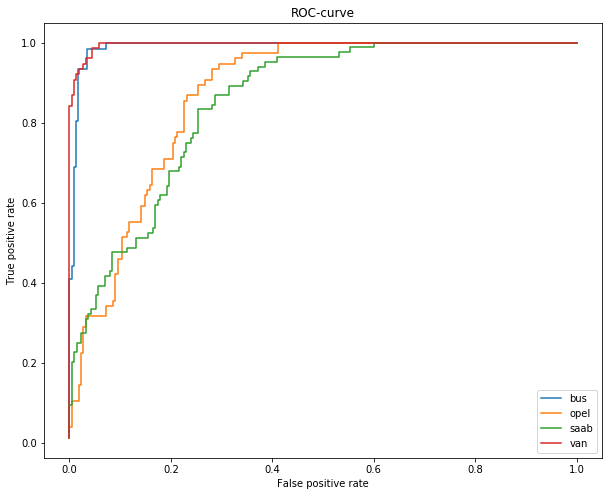

In [111]:
# Построим ROC-кривую
def plot_roc_curve(X_test, y_test, lr):
    actuals, probas = binarize(X_test, y_test, lr)
    plt.figure(figsize=(10, 8))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC-curve')

    for actual, proba, description in zip(actuals, probas, ['bus', 'opel', 'saab', 'van']):
        fpr, tpr, _ = roc_curve(actual, proba)
        plt.plot(fpr, tpr, label=description)
    plt.legend()
    plt.show()
    
plot_roc_curve(X_test, y_test, lr)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [112]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100
dimensions = np.linspace(1, cumsum.shape[0], cumsum.shape[0], dtype=int)

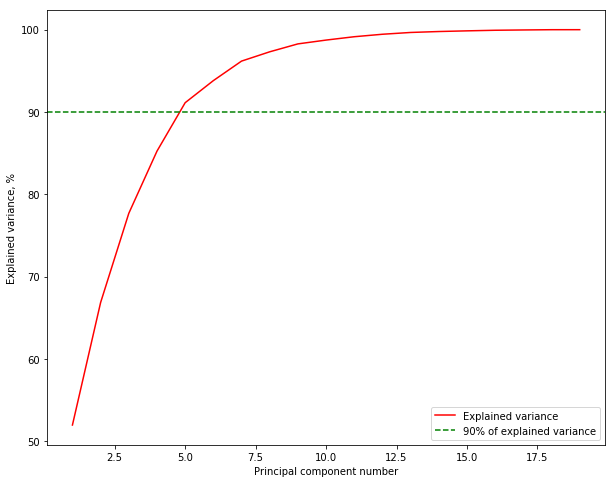

In [74]:
plt.figure(figsize=(10, 8))
plt.plot(dimensions, cumsum, color='red', label='Explained variance')
plt.axhline(y=90, color='green', linestyle='--', label='90% of explained variance')
plt.ylabel('Explained variance, %')
plt.xlabel('Principal component number')
plt.legend(loc=4)
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [104]:
# Выбираем число компонент равное 5. При этом количестве компонент сохраняется примерно 90% дисперсии.

pca = PCA(n_components=5)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [105]:
lr = LogisticRegression(solver='saga', max_iter=10000, multi_class='multinomial', n_jobs=-1)
params = {'penalty': ['l1', 'l2'], 'C': np.linspace(3, 20, 18)}
gc = GridSearchCV(estimator=lr, param_grid=params, scoring='accuracy', cv=5)

gc.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
print('Best score: {:.3f}'.format(gc.best_score_))
print('Best params: penalty = {:}, C = {:.1f}'.format(gc.best_params_['penalty'], gc.best_params_['C']))

Best score: 0.457
Best params: penalty = l1, C = 8.0


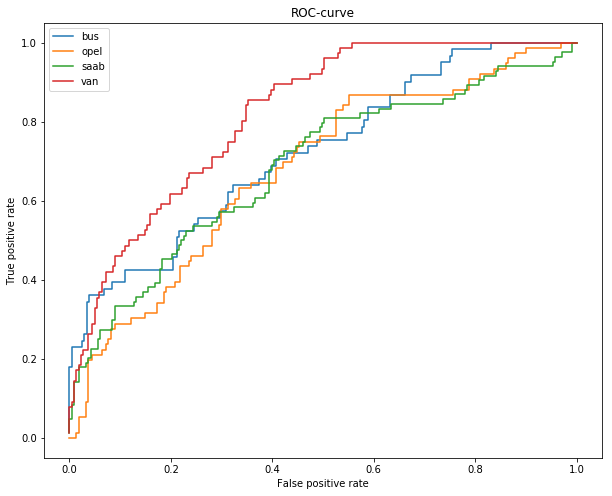

In [114]:
lr = LogisticRegression(solver='saga', max_iter=10000, multi_class='multinomial', n_jobs=-1, penalty='l1', C=8)
lr.fit(X_train_pca, y_train)

plot_roc_curve(X_test_pca, y_test, lr)

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [122]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
params = {'max_depth': np.linspace(1, 30, 30, dtype=int)}
gc = GridSearchCV(estimator=tree_clf, param_grid=params, scoring='accuracy', cv=5)

Best score: 0.709
Best params: max_depth = 12


In [123]:
# Исходные данные
gc.fit(X_train, y_train)
print('Best score: {:.3f}'.format(gc.best_score_))
print('Best params: max_depth = {:}'.format(gc.best_params_['max_depth']))

Best score: 0.703
Best params: max_depth = 12


Accuracy of Decision tree classifier on test set: 0.670
F1-score of Decision tree classifier on test set: 0.683


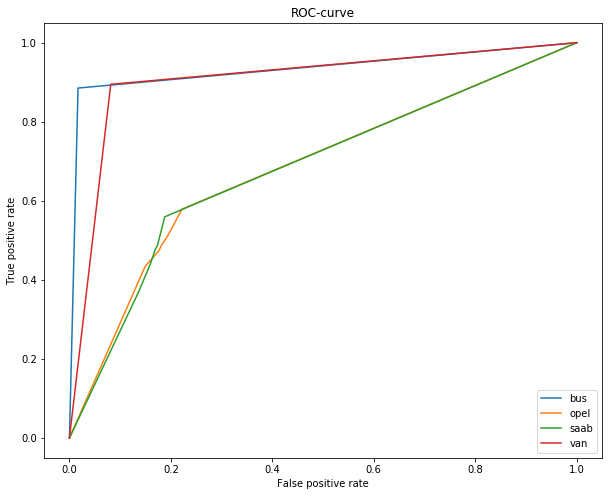

In [128]:
tree_clf = DecisionTreeClassifier(max_depth=gc.best_params_['max_depth'])
tree_clf.fit(X_train, y_train)

predictions = tree_clf.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.3f}'.format(
    accuracy_score(y_true=y_test, y_pred=predictions)))
print('F1-score of Decision tree classifier on test set: {:.3f}'.format(
    f1_score(y_true=y_test, y_pred=predictions, average='macro')))

plot_roc_curve(X_test, y_test, tree_clf)

In [129]:
# Преобразованные данные 
gc.fit(X_train_pca, y_train)
print('Best score: {:.3f}'.format(gc.best_score_))
print('Best params: max_depth = {:}'.format(gc.best_params_['max_depth']))

Best score: 0.557
Best params: max_depth = 7


Accuracy of Decision tree classifier on test set: 0.522
F1-score of Decision tree classifier on test set: 0.520


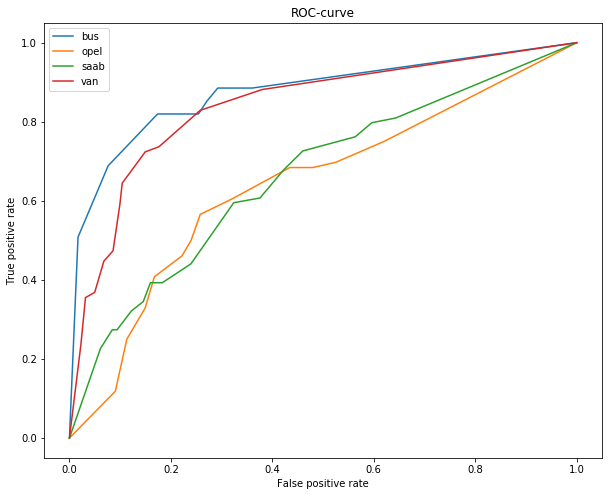

In [131]:
tree_clf = DecisionTreeClassifier(max_depth=gc.best_params_['max_depth'])
tree_clf.fit(X_train_pca, y_train)

predictions = tree_clf.predict(X_test_pca)
print('Accuracy of Decision tree classifier on test set: {:.3f}'.format(
    accuracy_score(y_true=y_test, y_pred=predictions)))
print('F1-score of Decision tree classifier on test set: {:.3f}'.format(
    f1_score(y_true=y_test, y_pred=predictions, average='macro')))

plot_roc_curve(X_test_pca, y_test, tree_clf)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [173]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.